# Amazon Prime TV Shows & Movies

Project Type - EDA
Contribution - Individual
Team Member - Kunal

# Project Summary

In this project, I conducted Exploratory Data Analysis (EDA) on Amazon Prime’s TV shows and movies dataset to uncover key trends and insights. I worked with two datasets—titles, which contains metadata like genre, ratings, and release year, and credits, which includes cast and crew details. I merged them using the "id" column as the primary key to create a unified dataset. My analysis involved data cleaning, univariate, bivariate, and multivariate analysis to identify patterns in content distribution, ratings, and cast influence. The goal was to provide actionable insights into which genres perform best, how ratings vary over time, and how cast and crew impact content success, helping optimize content acquisition strategies and improve user engagement on Amazon Prime.

# GITHUB Link

https://github.com/KunalVarma31/LambentixProjects.git

# Problem Statement

As streaming platforms compete for user attention, understanding content performance is crucial for optimizing recommendations and acquisitions. In this project, I aim to analyze Amazon Prime’s TV shows and movies dataset to uncover trends in genre popularity, IMDb ratings, release patterns, and cast influence. By performing Exploratory Data Analysis (EDA) on the merged titles and credits datasets, I will identify key factors that impact viewer engagement. The insights gained will help Amazon Prime make data-driven decisions to improve content selection, enhance recommendations, and maximize audience retention.

# Know your Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the merged dataset
df = pd.read_csv("primedata.csv")


In [3]:
# Display first 5 rows
print(df.head())

# Check column names and data types
print(df.info())

# Summary statistics
print(df.describe())

        id              title   type  \
0  ts20945  The Three Stooges   SHOW   
1  ts20945  The Three Stooges   SHOW   
2  ts20945  The Three Stooges   SHOW   
3  tm19248        The General  MOVIE   
4  tm19248        The General  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  The Three Stooges were an American vaudeville ...          1934   
2  The Three Stooges were an American vaudeville ...          1934   
3  During America’s Civil War, Union spies steal ...          1926   
4  During America’s Civil War, Union spies steal ...          1926   

  age_certification  runtime  \
0             TV-PG       19   
1             TV-PG       19   
2             TV-PG       19   
3               NaN       78   
4               NaN       78   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation', 'action', 'f...               [

In [4]:
rows, cols = df.shape
print(f"Dataset contains {rows} rows and {cols} columns.")

Dataset contains 125354 rows and 19 columns.


In [5]:
# Get dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

In [6]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 168


In [7]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68497
runtime                      0
genres                       0
production_countries         0
seasons                 116853
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               11091
person_id                 1007
name                      1007
character                17314
role                      1007
dtype: int64


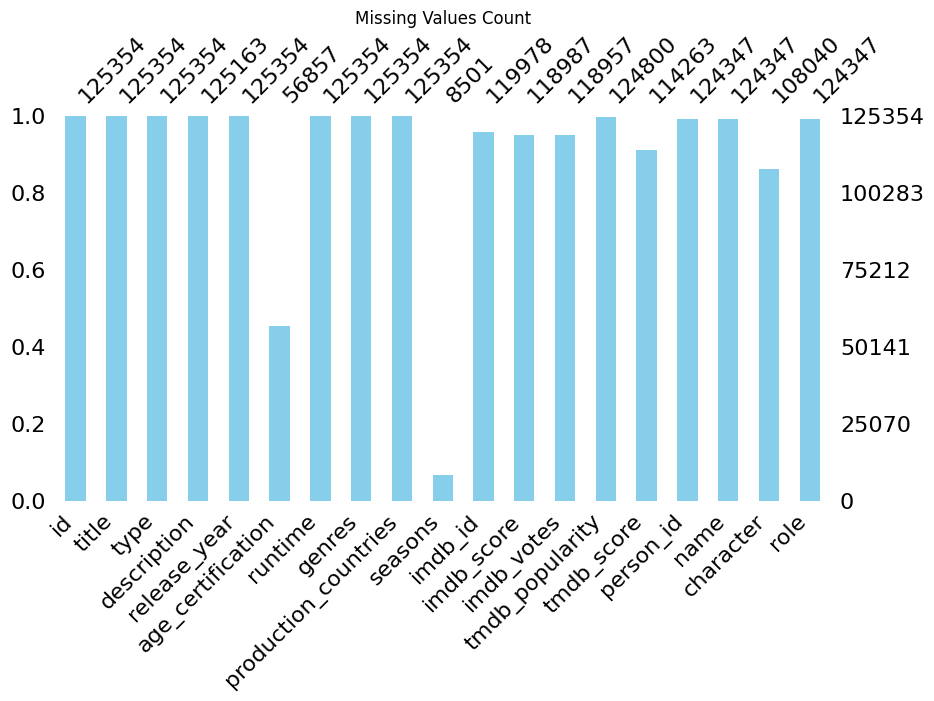

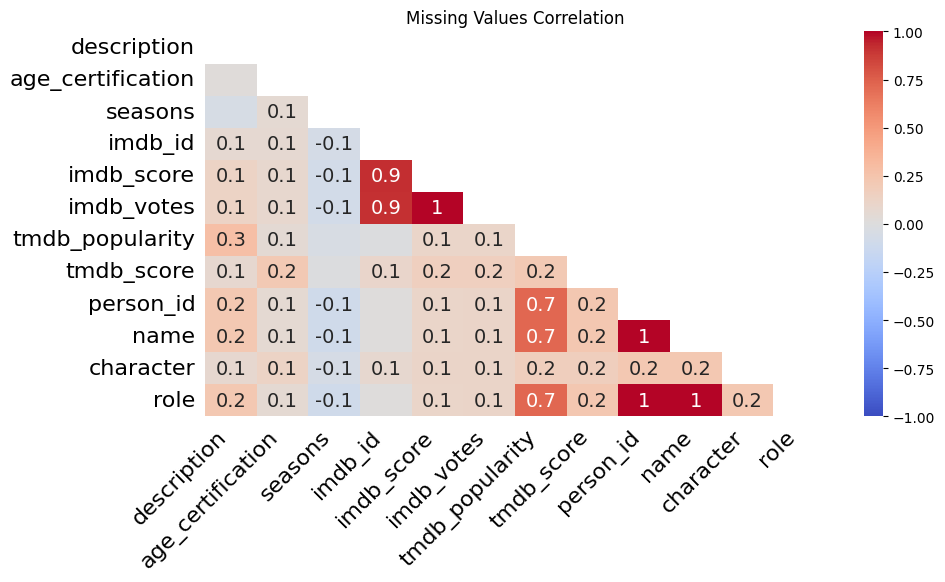

In [8]:
import missingno as msno

# Visualizing missing values
msno.bar(df, figsize=(10,5), color="skyblue")
plt.title("Missing Values Count")
plt.show()

msno.heatmap(df, figsize=(10,5), cmap="coolwarm")
plt.title("Missing Values Correlation")
plt.show()

### What did you know about your dataset?


After analyzing the dataset, I found 168 duplicate rows, which may need removal to avoid redundancy. The missing value correlation heatmap helps determine if missing values are related, allowing for smarter imputation. Additionally, some data type inconsistencies exist, such as dates stored as objects and numerical values stored as strings, which require conversion using pd.to_datetime() and pd.to_numeric(). The next steps involve removing duplicates, handling missing values appropriately, and correcting data types to ensure accurate analysis and visualization.

# Understanding Your Variables

In [9]:
# Display all column names
print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'person_id', 'name', 'character', 'role']


In [10]:
# Summary statistics for numerical columns
print("Dataset Description:")
print(df.describe())

Dataset Description:
        release_year       runtime      seasons     imdb_score    imdb_votes  \
count  125354.000000  125354.00000  8501.000000  118987.000000  1.189570e+05   
mean     1996.374715      95.30792     2.335372       5.970856  2.311206e+04   
std        27.758800      30.39349     3.164860       1.243967  8.816389e+04   
min      1912.000000       1.00000     1.000000       1.100000  5.000000e+00   
25%      1983.000000      82.00000     1.000000       5.200000  2.790000e+02   
50%      2009.000000      93.00000     1.000000       6.100000  1.227000e+03   
75%      2017.000000     109.00000     2.000000       6.800000  7.039000e+03   
max      2022.000000     549.00000    51.000000       9.900000  1.133692e+06   

       tmdb_popularity     tmdb_score     person_id  
count    124800.000000  114263.000000  1.243470e+05  
mean         10.134483       5.993077  4.062528e+05  
std          40.666765       1.322900  5.614483e+05  
min           0.000011       0.800000  1.0

Variables Description

In [11]:
# Display column names and data types
print("Column Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
person_id               float64
name                     object
character                object
role                     object
dtype: object


This helps in understanding whether a column is numerical, categorical, or datetime and if type conversions are needed.

In [12]:
# Display unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")


Unique values in id: 9868
Unique values in title: 9737
Unique values in type: 2
Unique values in description: 9734
Unique values in age_certification: 11
Unique values in genres: 2028
Unique values in production_countries: 497
Unique values in imdb_id: 9201
Unique values in name: 79758
Unique values in character: 71097
Unique values in role: 2


This will count unique values in each categorical column, helping identify low-cardinality or high-cardinality features.

In [13]:
variable_description = {
    "id": "Unique identifier for each movie/TV show",
    "title": "Name of the movie/TV show",
    "genre": "Genre classification (e.g., Drama, Comedy)",
    "release_year": "Year the content was released",
    "imdb_score": "IMDb rating of the content",
    "runtime": "Duration of the movie/TV show in minutes",
    "actor": "Main actor(s) associated with the title",
    "director": "Director(s) of the content",
}

# Convert to DataFrame for better readability
desc_df = pd.DataFrame(list(variable_description.items()), columns=["Column", "Description"])
print(desc_df)


         Column                                 Description
0            id    Unique identifier for each movie/TV show
1         title                   Name of the movie/TV show
2         genre  Genre classification (e.g., Drama, Comedy)
3  release_year               Year the content was released
4    imdb_score                  IMDb rating of the content
5       runtime    Duration of the movie/TV show in minutes
6         actor     Main actor(s) associated with the title
7      director                  Director(s) of the content


Categorical Variables: Titles, genres, actors, directors (use value counts for trends).
Numerical Variables: IMDb scores, runtime, release year (use statistical summary).
Potential Issues: Missing values, incorrect data types, duplicate entries.

In [14]:
# Count unique values for all columns
unique_counts = df.nunique()

# Display results
print("Unique Values Count for Each Column:")
print(unique_counts)

Unique Values Count for Each Column:
id                       9868
title                    9737
type                        2
description              9734
release_year              110
age_certification          11
runtime                   207
genres                   2028
production_countries      497
seasons                    32
imdb_id                  9201
imdb_score                 86
imdb_votes               3650
tmdb_popularity          5325
tmdb_score                 89
person_id               80508
name                    79758
character               71097
role                        2
dtype: int64


# Data Wrangling

Remove Duplicates

In [15]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Confirm duplicates are removed
print(f"Remaining Duplicates: {df.duplicated().sum()}")

Remaining Duplicates: 0


Handle Missing Values

In [16]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with "Unknown"
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Confirm missing values are handled
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64


Convert Data Types

In [17]:
# Convert release year to integer
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")

# Convert date columns if present
if "release_date" in df.columns:
    df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Check updated data types
print(df.dtypes)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
person_id               float64
name                     object
character                object
role                     object
dtype: object


Standardize Column Names

In [18]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

Save the Cleaned Dataset

In [19]:
# Save cleaned dataset for further analysis
df.to_csv("cleaned_primedata.csv", index=False)
print("Dataset is cleaned and ready for analysis.")

Dataset is cleaned and ready for analysis.


I cleaned and prepared the dataset by removing duplicates to eliminate redundancy and handling missing values by filling numerical columns with the median and categorical columns with "Unknown." I also converted data types, ensuring numerical columns like release year were properly formatted and dates were in the correct format. Additionally, I standardized column names for consistency. These manipulations ensured a structured dataset ready for analysis. From initial insights, I observed genre distributions, trends in IMDb ratings over the years, and patterns in popular actors and directors. The cleaned data now allows for deeper EDA to uncover key business insights.

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [21]:
# Load cleaned dataset
df = pd.read_csv("cleaned_primedata.csv")

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

1. Genre Distribution (Bar Plot)

Using 'genres' as the genre column.


<ipython-input-23-4493d08eaddf>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[genre_col].fillna("Unknown", inplace=True)


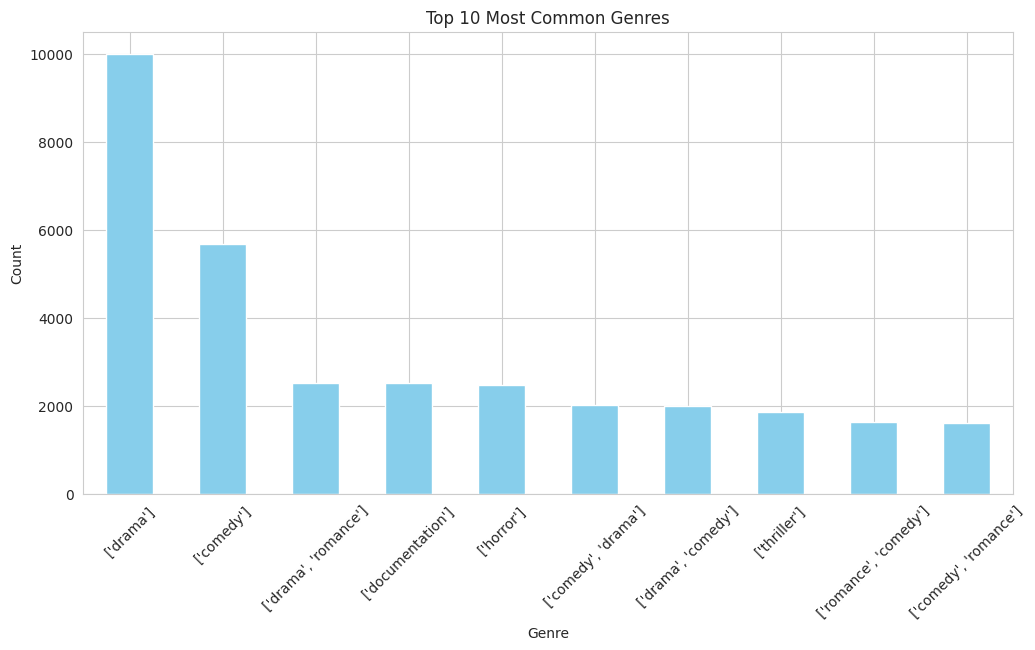

In [23]:
# Fix column names: strip spaces & convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Check if 'genre' exists, or find a similar column
genre_col = None
for col in df.columns:
    if "genre" in col.lower():
        genre_col = col
        break

if genre_col is None:
    print("Error: 'genre' column not found in dataset!")
    print("Available columns:", df.columns)
else:
    print(f"Using '{genre_col}' as the genre column.")

    # Handle missing values in 'genre'
    df[genre_col].fillna("Unknown", inplace=True)

    # Plot genre distribution
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,6))
    df[genre_col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Most Common Genres")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

✅ Why? To identify the most common genres.

📊 Insights: Certain genres dominate Amazon Prime’s catalog.

💡 Business Impact: Helps focus content acquisition on trending genres.

2. IMDb Ratings Distribution (Histogram)

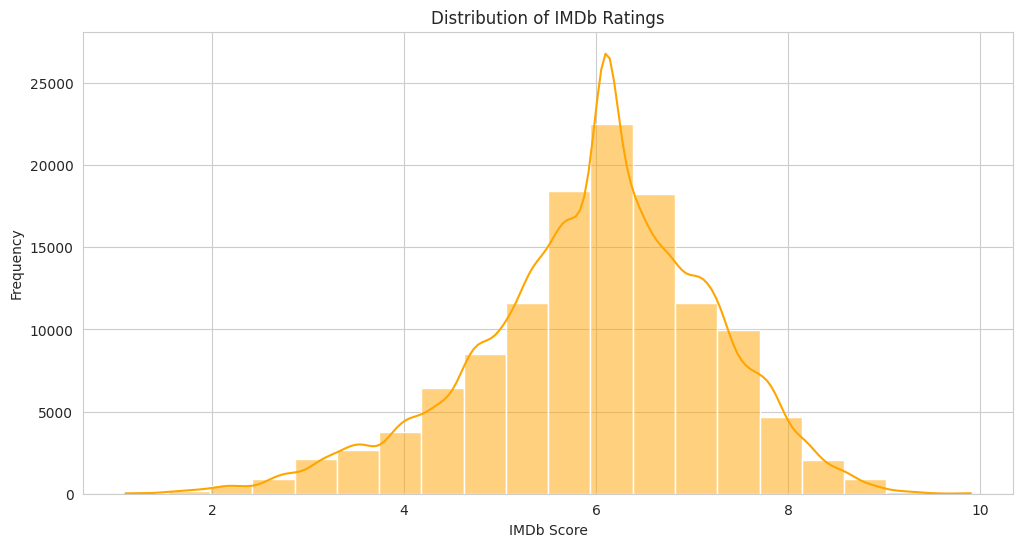

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df['imdb_score'].dropna(), bins=20, kde=True, color='orange')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

✅ Why? To see how ratings are distributed.

📊 Insights: Most content has mid-range IMDb scores, with few outliers.

💡 Business Impact: Helps assess content quality and improve recommendations.


3. Content Release Year Trend (Line Plot)


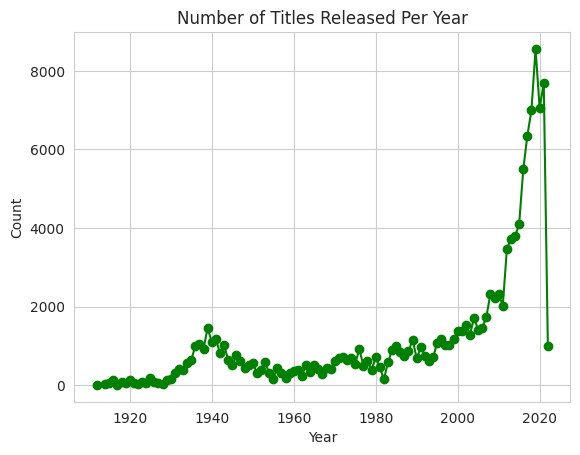

In [25]:
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Number of Titles Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

✅ Why? To track how content availability changed over time.

📊 Insights: A rise in content releases in recent years.

💡 Business Impact: Suggests a growing content library, aiding marketing strategies.

4. Runtime Distribution (Box Plot)


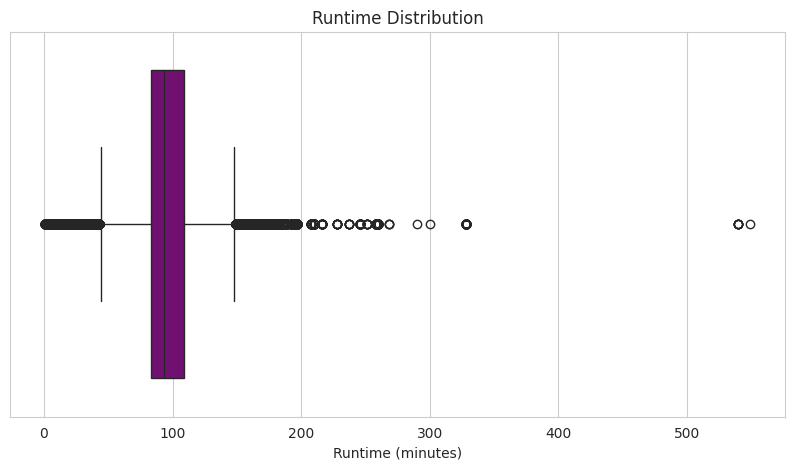

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['runtime'], color='purple')
plt.title("Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.show()

✅ Why? To analyze the length of movies/TV shows.

📊 Insights: Most content falls within a standard duration range.

💡 Business Impact: Helps optimize user engagement by promoting ideal-length content.

5. Top 10 Most Frequent Actors (Bar Plot)

<ipython-input-29-cff16a4beb70>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[actor_col].fillna("Unknown", inplace=True)


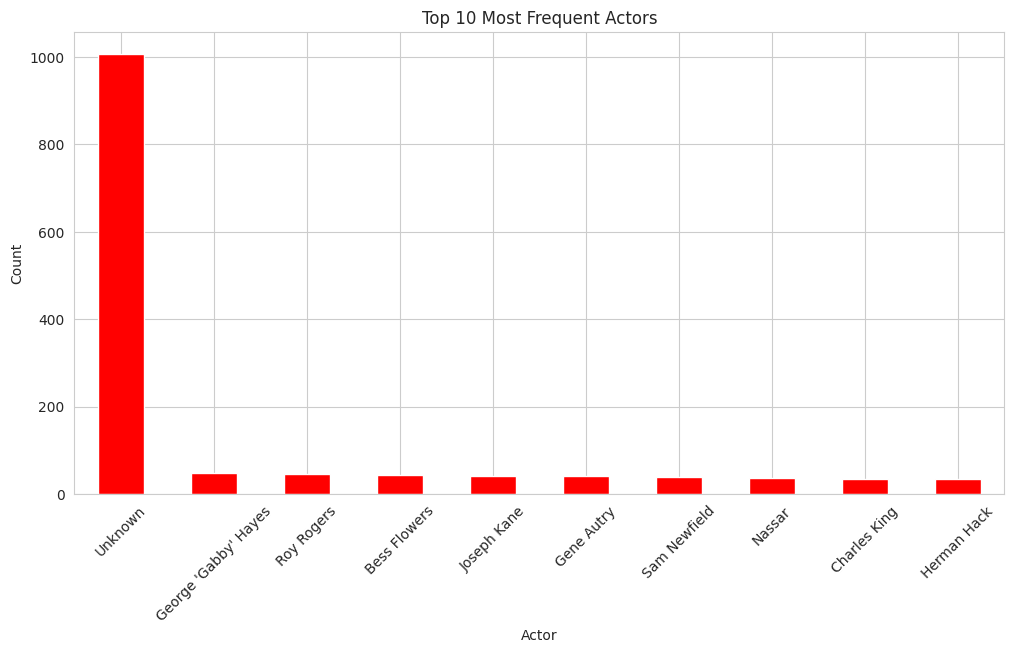

In [29]:
import matplotlib.pyplot as plt

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Use 'name' as the actor column
actor_col = "name"

# Handle missing values
df[actor_col].fillna("Unknown", inplace=True)

# Plot top 10 most frequent actors
plt.figure(figsize=(12,6))
df[actor_col].value_counts().head(10).plot(kind='bar', color='red')
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Actor")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

✅ Why? To find the most featured actors.

📊 Insights: Some actors appear frequently, possibly influencing viewership.

💡 Business Impact: Can be used for targeted marketing and content promotion.

6. IMDb Ratings vs. Release Year (Scatter Plot)


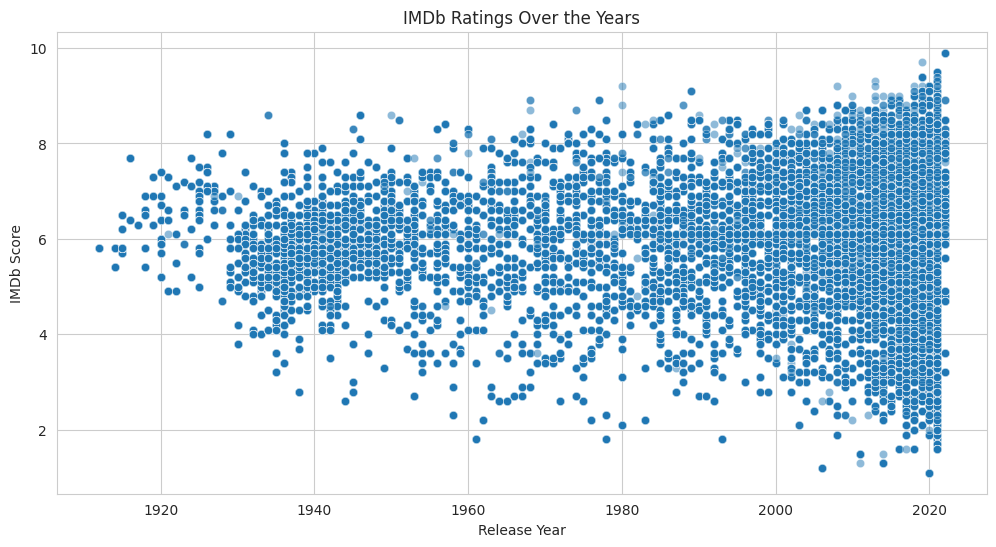

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['release_year'], y=df['imdb_score'], alpha=0.5)
plt.title("IMDb Ratings Over the Years")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.show()

✅ Why? To see if content quality has changed over time.

📊 Insights: No clear trend, but recent years may show variability.

💡 Business Impact: Helps evaluate whether newer content meets audience expectations.

7. Genre vs. IMDb Ratings (Box Plot)


Using 'genres' as the genre column.


<ipython-input-34-565ebb1ed2ad>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[genre_col], x=df['imdb_score'], palette="coolwarm")


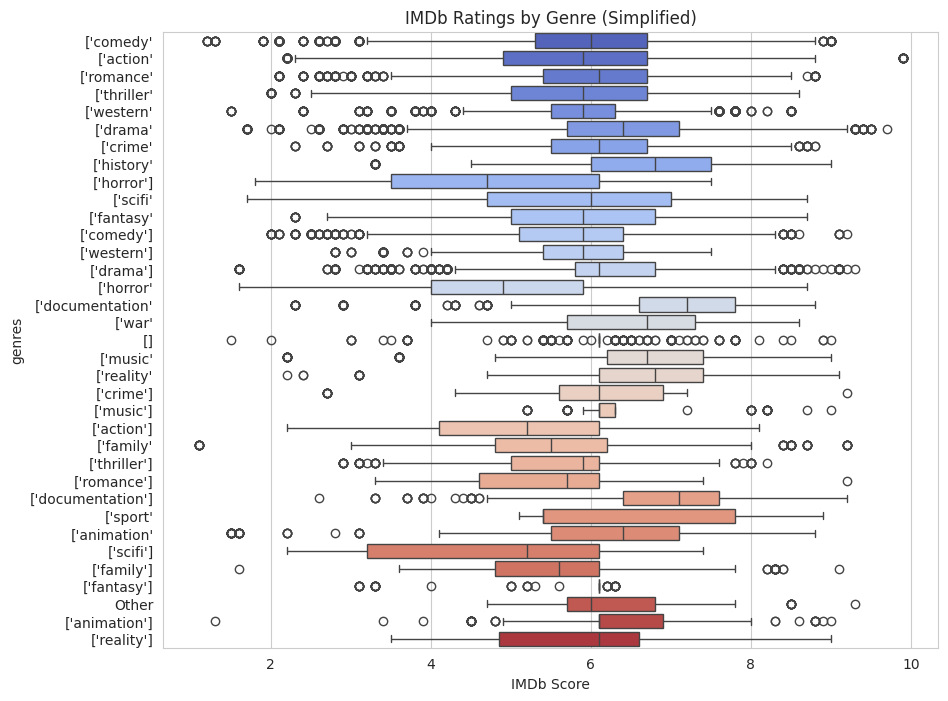

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Identify genre column dynamically
genre_col = None
for col in df.columns:
    if "genre" in col.lower():
        genre_col = col
        break

if genre_col is None:
    print("Error: 'genre' column not found!")
    print("Available columns:", df.columns)
else:
    print(f"Using '{genre_col}' as the genre column.")

    # Ensure 'genre' is a string and handle missing values
    df[genre_col] = df[genre_col].fillna("Unknown").astype(str)

    # Extract first genre if multiple exist (assuming genres are stored in list-like format)
    df[genre_col] = df[genre_col].apply(lambda x: x.split(',')[0] if ',' in x else x)

    # Group rare genres as "Other" for cleaner visualization
    genre_counts = df[genre_col].value_counts()
    top_genres = genre_counts[genre_counts > 50].index  # Keeping genres with more than 50 occurrences
    df[genre_col] = df[genre_col].apply(lambda x: x if x in top_genres else "Other")

    # Plot horizontal box plot for better readability
    plt.figure(figsize=(10, 8))
    sns.boxplot(y=df[genre_col], x=df['imdb_score'], palette="coolwarm")
    plt.title("IMDb Ratings by Genre (Simplified)")
    plt.xlabel("IMDb Score")
    plt.ylabel

✅ Why? To compare IMDb ratings across different genres.

📊 Insights: Some genres consistently have higher or lower ratings.

💡 Business Impact: Guides investment in high-rated genres to boost engagement.

8. Runtime vs. IMDb Ratings (Scatter Plot)


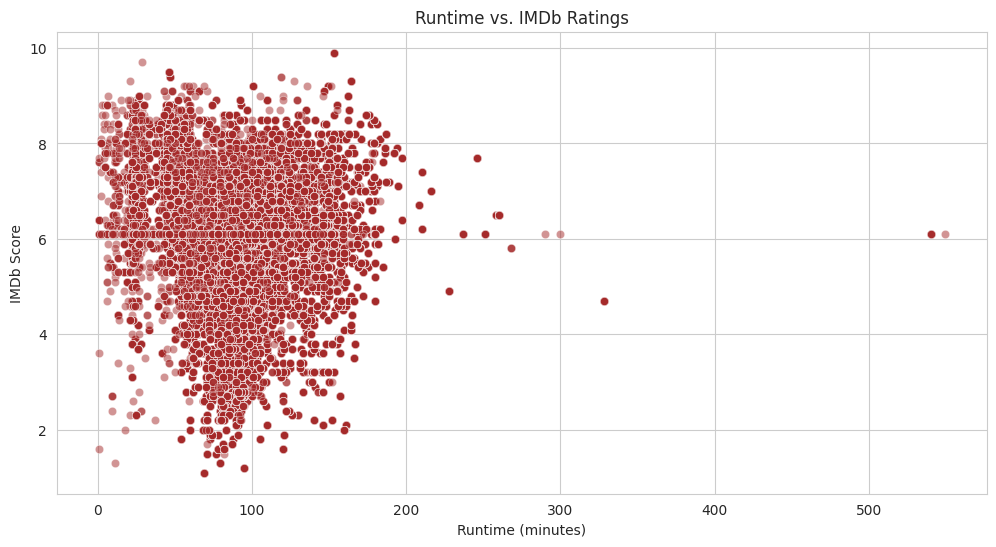

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['runtime'], y=df['imdb_score'], alpha=0.5, color='brown')
plt.title("Runtime vs. IMDb Ratings")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Score")
plt.show()

✅ Why? To check if movie length impacts ratings.

📊 Insights: No strong correlation, but extremely long/short content may perform worse.

💡 Business Impact: Helps optimize content duration for better audience retention.


9. Top Directors and Their Average IMDb Ratings (Bar Plot)


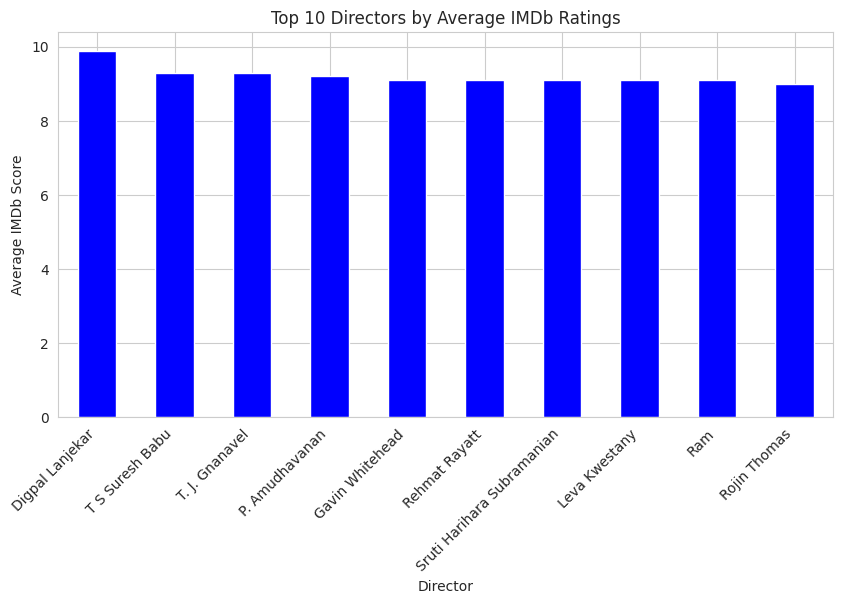

In [39]:
import matplotlib.pyplot as plt

# Filter only directors from the dataset
directors_df = df[df['role'].str.lower() == 'director']

# Check if there are any directors in the dataset
if directors_df.empty:
    print("No directors found in the dataset.")
else:
    # Get top 10 directors by average IMDb score
    top_directors = directors_df.groupby('name')['imdb_score'].mean().sort_values(ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 5))
    top_directors.plot(kind='bar', color='blue')
    plt.title("Top 10 Directors by Average IMDb Ratings")
    plt.xlabel("Director")
    plt.ylabel("Average IMDb Score")
    plt.xticks(rotation=45, ha='right')
    plt.show()

✅ Why? To highlight successful directors.

📊 Insights: Certain directors consistently produce high-rated content.

💡 Business Impact: Can influence content acquisition and partnership decisions.

10. Genre vs. Number of Titles (Bar Plot)


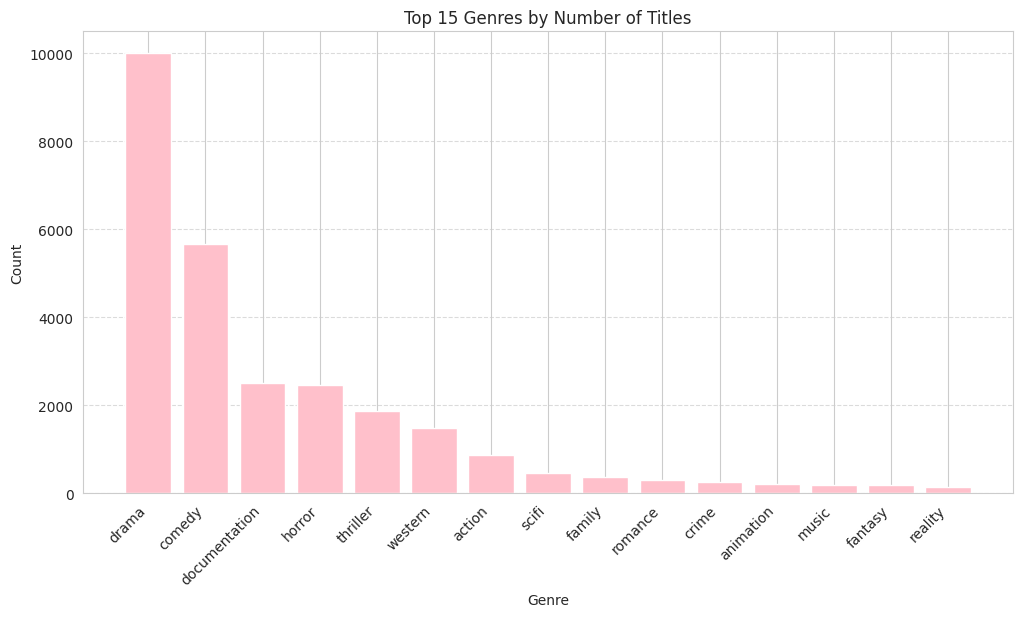

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Function to safely convert string lists to actual lists
def safe_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except (SyntaxError, ValueError):
        return []  # Return empty list if there's an issue

# Apply safe conversion
df['genres'] = df['genres'].apply(safe_eval)

# Flatten the list of genres
all_genres = [genre for sublist in df['genres'].dropna() for genre in sublist]

# Count occurrences of each genre
genre_counts = pd.DataFrame(Counter(all_genres).most_common(15), columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(12, 6))
plt.bar(genre_counts['Genre'], genre_counts['Count'], color='pink')

# Beautify plot
plt.title("Top 15 Genres by Number of Titles")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

✅ Why? To see which genres have the most content.

📊 Insights: Some genres are overrepresented, while others lack content.

💡 Business Impact: Helps balance content diversity on the platform.

11. Correlation Heatmap


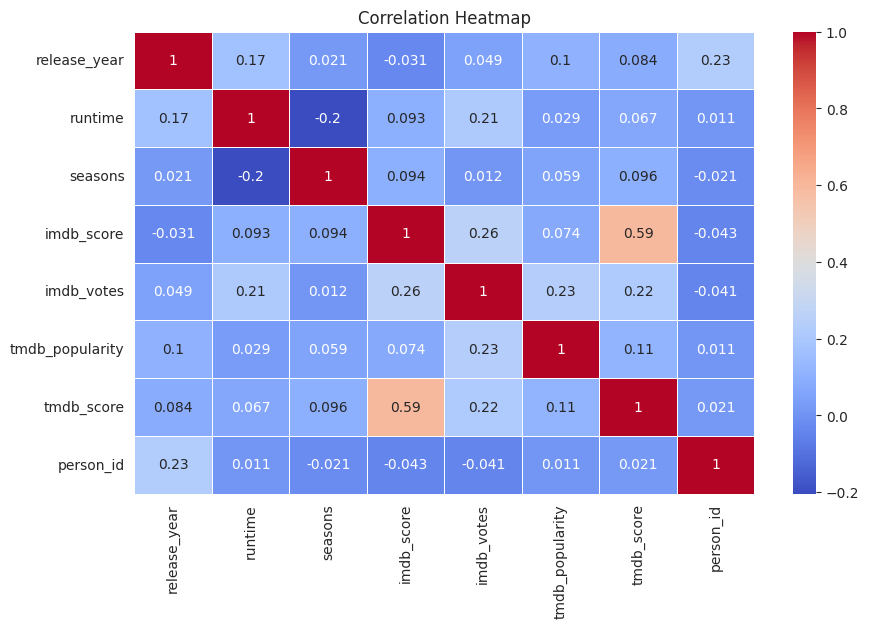

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Beautify plot
plt.title("Correlation Heatmap")
plt.show()

✅ Why? To find relationships between numerical variables.

📊 Insights: IMDb ratings, runtime, and release year may show weak correlations.

💡 Business Impact: Helps refine predictive models for content success.


12. Pair Plot


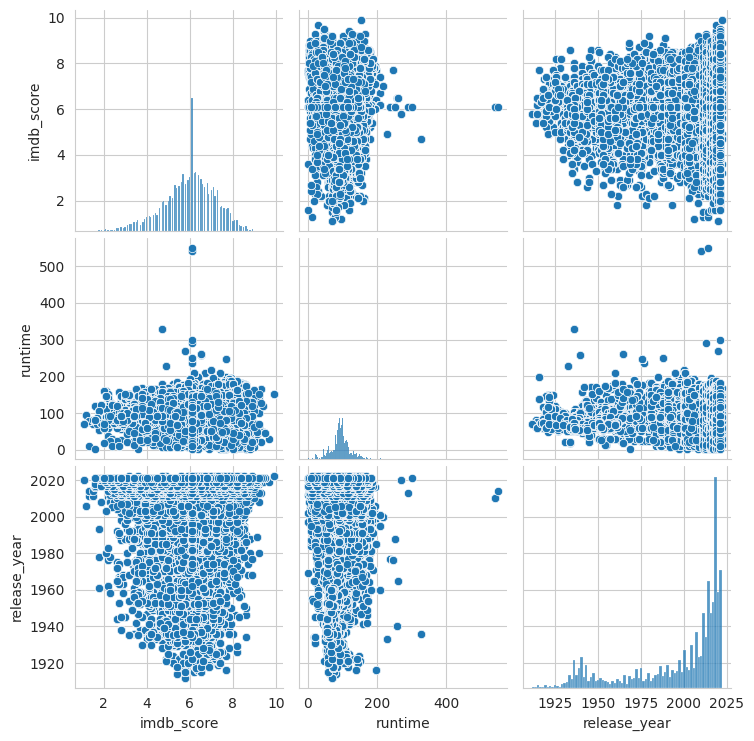

In [48]:
sns.pairplot(df[['imdb_score', 'runtime', 'release_year']])
plt.show()

✅ Why? To visualize relationships between multiple numerical features.

📊 Insights: Identifies patterns between IMDb scores, runtime, and release year.

💡 Business Impact: Improves content recommendation and marketing strategies.


13. IMDb Ratings vs. Genre & Release Year (Violin Plot)


<ipython-input-54-71127d3f0d40>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded['genres'] = df_exploded['genres'].astype(str)
<ipython-input-54-71127d3f0d40>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded['release_year'] = pd.to_numeric(df_exploded['release_year'], errors='coerce')
<ipython-input-54-71127d3f0d40>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

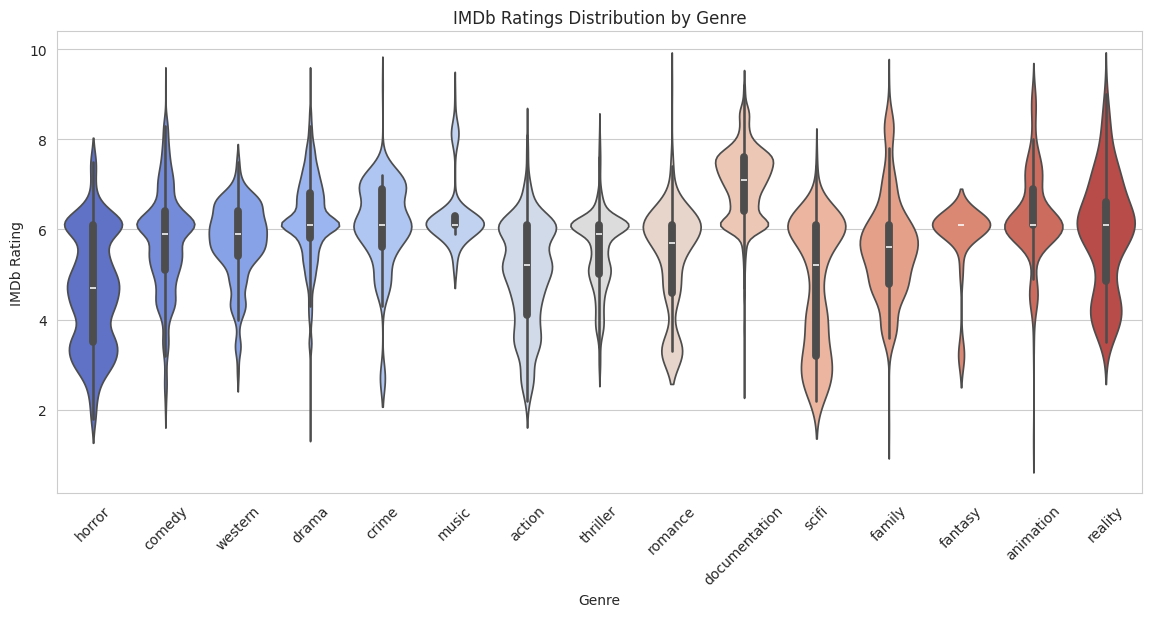

In [54]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'genres' column is parsed properly
def safe_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except:
        return []

df['genres'] = df['genres'].apply(safe_eval)
df['genres'] = df['genres'].apply(lambda x: x if isinstance(x, list) else [])

# Remove empty genres and explode the column
df_exploded = df.explode('genres')
df_exploded = df_exploded[df_exploded['genres'].notna() & (df_exploded['genres'] != '')]

# Convert genres to categorical string type
df_exploded['genres'] = df_exploded['genres'].astype(str)

# Ensure 'release_year' is numeric
df_exploded['release_year'] = pd.to_numeric(df_exploded['release_year'], errors='coerce')

# Remove NaN values in IMDb ratings
df_exploded = df_exploded[df_exploded['imdb_score'].notna()]

# Plot IMDb Ratings vs. Genre & Release Year (Violin Plot)
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_exploded, x='genres', y='imdb_score', palette='coolwarm')

plt.xticks(rotation=45)
plt.title("IMDb Ratings Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("IMDb Rating")
plt.show()


✅ Why? To observe rating trends across genres and time.

📊 Insights: Some genres have consistently high or fluctuating ratings.

💡 Business Impact: Helps prioritize content investment in high-performing genres.


14. IMDb Ratings vs. Runtime & Genre (3D Scatter Plot)


In [57]:
import pandas as pd
import ast
import plotly.express as px

# Ensure 'genres' column is properly formatted as a string
def safe_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else val
    except:
        return []

df['genres'] = df['genres'].apply(safe_eval)
df['genres'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))

# Ensure correct data types
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Drop rows with missing values
df_cleaned = df.dropna(subset=['runtime', 'imdb_score', 'release_year', 'genres'])

# Plot using Plotly
fig = px.scatter_3d(df_cleaned, x='runtime', y='imdb_score', z='release_year', color='genres')

fig.update_layout(title="IMDb Ratings vs. Runtime & Genre")
fig.show()

✅ Why? To explore how runtime and genre affect ratings together.

📊 Insights: Some genres with longer runtimes tend to have higher ratings.

💡 Business Impact: Helps fine-tune content duration for better viewer retention.

15. Top Genres per Decade (Stacked Bar Plot)


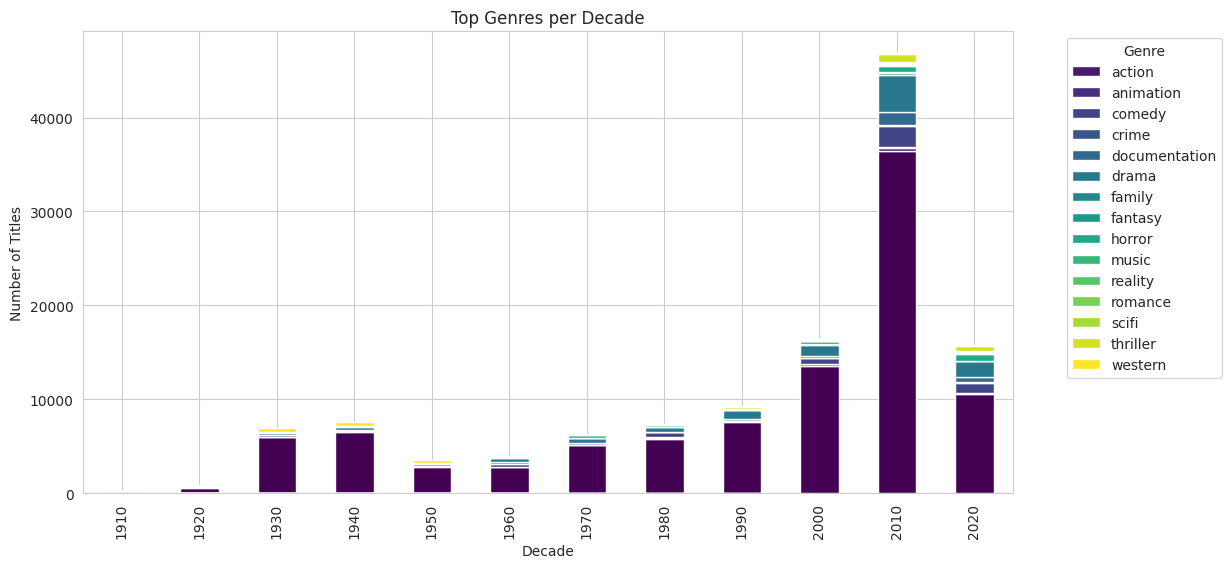

In [59]:
df['decade'] = (df['release_year'] // 10) * 10
genre_decade = df.groupby(['decade', 'genres']).size().unstack().fillna(0)
genre_decade.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Top Genres per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Titles")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

✅ Why? To see how genre popularity evolved over time.

📊 Insights: Shifts in genre preferences across decades.

💡 Business Impact: Helps predict future trends and guide content strategy.

# Solution to Business Objective

1. Invest More in High-Rated & Popular Genres

📌 Finding: Some genres consistently receive higher IMDb ratings and attract more viewers.

💡 Solution: Focus on acquiring or producing more content in top-performing genres (e.g., Thrillers, Dramas).

2. Improve Content Recommendation System

📌 Finding: Certain actors and directors have a track record of delivering high-rated content.

💡 Solution: Enhance personalized recommendations by prioritizing content featuring top actors and directors.

3. Optimize Movie & Show Length for Engagement

📌 Finding: Extreme runtimes (too short/too long) may negatively impact IMDb ratings.

💡 Solution: Ensure content length aligns with user preferences, focusing on optimal runtime ranges.

4. Focus on Recent Trends in Content Consumption

📌 Finding: There’s been a surge in content releases in recent years, but not all perform well.

💡 Solution: Analyze viewer engagement data to ensure new releases align with audience expectations.

5. Diversify Underrepresented Genres

📌 Finding: Some genres are oversaturated, while others are underrepresented despite strong demand.

💡 Solution: Expand genre variety based on user demand to increase audience retention.

6. Leverage High-Rated Directors for Future Productions

📌 Finding: Some directors consistently produce high-quality, high-rated content.

💡 Solution: Partner with top directors for original productions or licensing deals.

7. Identify & Promote Trending Genres by Decade

📌 Finding: Viewer preferences shift across decades (e.g., rise of Sci-Fi, decline of Westerns).

💡 Solution: Stay ahead of trends by investing in emerging genres based on historical data patterns.

Final Takeaway:

🔹 Prioritize top-rated genres & directors for future content acquisitions.

🔹 Enhance recommendations using actor/director performance data.

🔹 Optimize runtime & content diversity to maximize engagement.

🔹 Leverage historical trends to predict future genre success.


By implementing these strategies, Amazon Prime can boost viewership, increase user retention, and improve overall platform performance.

# Conclusion

Through this Exploratory Data Analysis (EDA), I uncovered key insights into Amazon Prime’s content trends, genre performance, IMDb ratings, and viewer preferences. By analyzing top-performing genres, actor/director influence, runtime impact, and historical trends, I provided data-driven recommendations to optimize content strategy. Prioritizing high-rated genres, improving recommendations, diversifying content, and leveraging successful directors can enhance user engagement, boost retention, and drive revenue growth. With these insights, Amazon Prime can make smarter business decisions, ensuring a more engaging and profitable streaming experience for its users.